# Adversarial example generation using Fast Gradient Sign method

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


## Load clean image

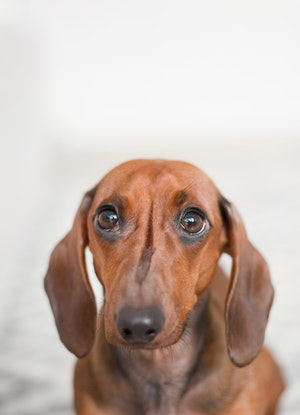

In [2]:
import requests
import io
from PIL import Image

url = 'https://github.com/Paulescu/adversarial-machine-learning/blob/main/images/dog.jpg?raw=true'

response = requests.get(url)
img = Image.open(io.BytesIO(response.content))
img

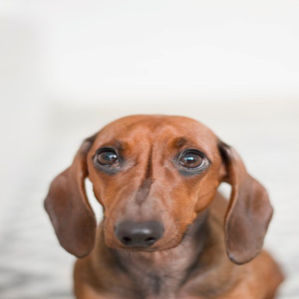

In [3]:
from src.model import *

x = inverse_preprocess(preprocess(img))
x

## Check model prediction is OK

In [4]:
from src.model import load_model

model = load_model()

27,161,264 parameters


In [5]:
from src.model import predict
predict(model, x)

/Users/paulabartabajo/src/online-courses/blogs/adversarial_ml/src/.venv/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


{'id': 168, 'label': 'redbone', 'confidence': 0.8855}

## Fast gradient sign method

In [6]:
from src.fgsm import fast_gradient_sign
epsilon = 0.02

from src.model import preprocess
x_adv, grad = fast_gradient_sign(model, preprocess(x), epsilon, output_type='rgb')

{'id': 168, 'label': 'redbone', 'confidence': 0.8855}


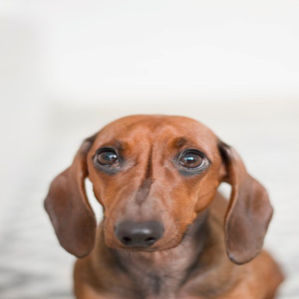

In [7]:
x_predictions = predict(model, x)
print(x_predictions)
x

{'id': 163, 'label': 'bloodhound', 'confidence': 0.1705}


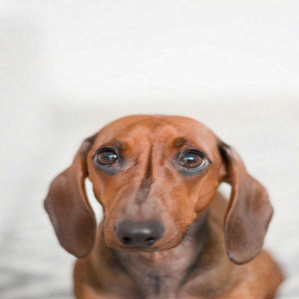

In [8]:
x_adv_predictions = predict(model, x_adv)
print(x_adv_predictions)
x_adv

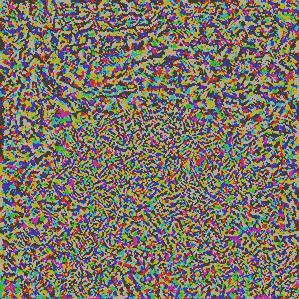

In [9]:
grad

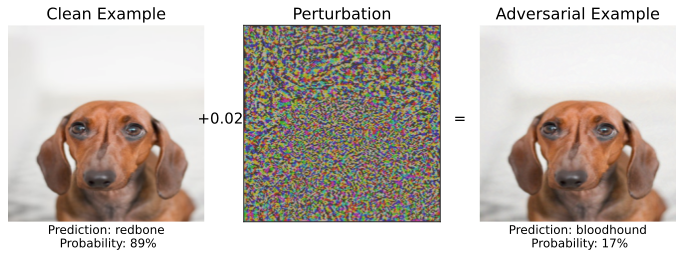

In [10]:
from src.viz import plot

plot(x, x_adv, grad, epsilon,
     x_label=x_predictions['label'],
     x_prob=x_predictions['confidence'],
     x_adv_label=x_adv_predictions['label'],
     x_adv_prob=x_adv_predictions['confidence'])

## Let's try different epsilon values

epsilon:  0.01


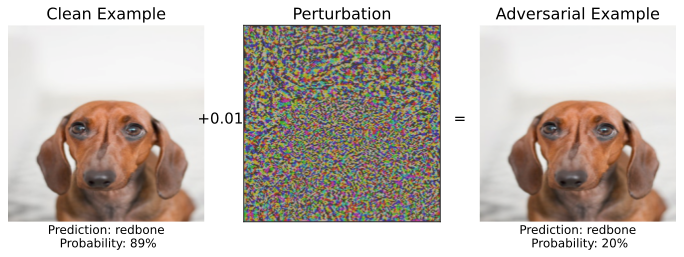

epsilon:  0.02


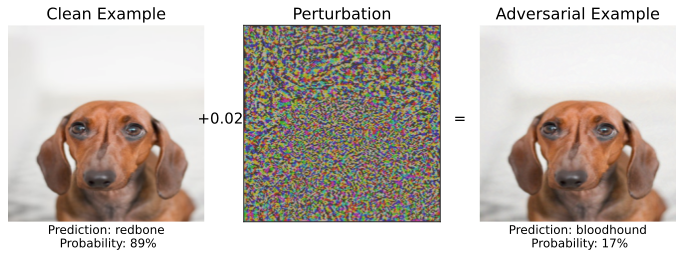

epsilon:  0.05


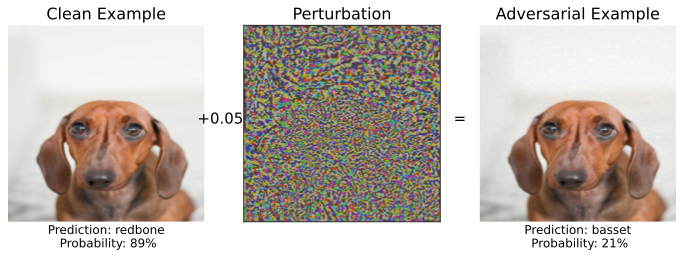

In [11]:
epsilons = [0.01, 0.02, 0.05]
for epsilon in epsilons:
        
    x_predictions = predict(model, x)
    x_adv, grad = fast_gradient_sign(model, preprocess(x), epsilon, output_type='rgb')
    x_adv_predictions = predict(model, x_adv)

    print('epsilon: ', epsilon)
    plot(x, x_adv, grad, epsilon,
         x_label=x_predictions['label'],
         x_prob=x_predictions['confidence'],
         x_adv_label=x_adv_predictions['label'],
         x_adv_prob=x_adv_predictions['confidence'])

## Iterative fast gradient sign

In [12]:
# def iterative_fast_gradient_sign(x_: Tensor, epsilon, n_steps, alpha):
#     """"""
#     x = x_.clone().detach()
    
#     for step in range(n_steps):
         
#         # one step using basic FGSM
#         x_adv, grad = fast_gradient_sign(x, alpha)
        
#         # total perturbation
#         total_grad = x_adv - x_
        
#         # force total perturbation to be lower than epsilon in
#         # absolute value
#         total_grad = torch.clamp(total_grad, -epsilon, epsilon)

#         # add total perturbation to the original image
#         x_adv = x_ + total_grad
        
#         print('Step ', step + 1)
#         visualize(x, x_adv, grad, eps)
        
#         x = x_adv
        
#     return x_adv, total_grad

In [14]:
from src.
eps = 0.25
n_steps = 9
alpha = 0.025
x_adv, grad = iterative_fast_gradient_sign(preprocess(x), eps, n_steps, alpha)

TypeError: fast_gradient_sign() missing 1 required positional argument: 'eps'

## Metamorphosis from dog to papertowel

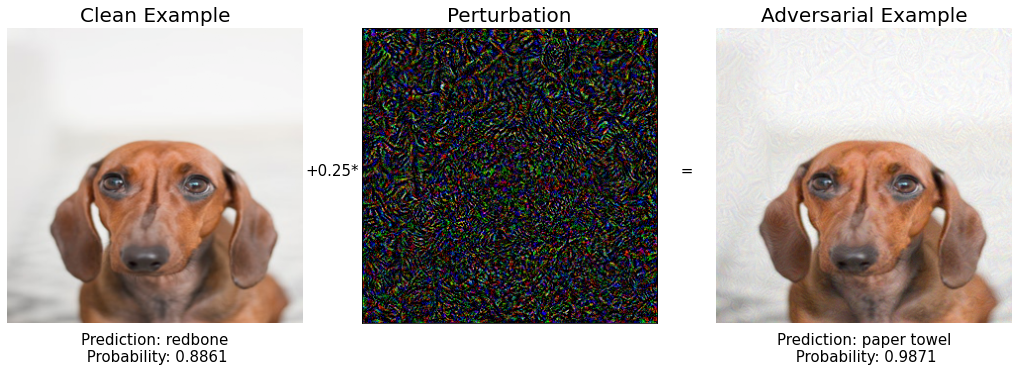

In [15]:
visualize(x, x_adv, grad/eps, eps)

## References

https://savan77.github.io/blog/imagenet_adv_examples.html